In [552]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.model_selection import train_test_split

stores_total_train = pd.read_csv("data/stores_train.csv")
stores_test = pd.read_csv("data/stores_test.csv")
stores_train, stores_val = train_test_split(stores_total_train, test_size=0.2, random_state=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [553]:
plaace_df = pd.read_csv('data/plaace_hierarchy.csv')

In [554]:
from constants import *
all_cats = []
for desc in plaace_cols_explain:
    all_cats.append(set(plaace_df[desc].values))

In [555]:
from utils import split_plaace_cat
total_place_df = split_plaace_cat(stores_total_train)
total_place_df['count'] = 1
total_place_df['var'] = total_place_df['revenue']
total_place_df = pd.merge(total_place_df, plaace_df, left_on='plaace_cat_4', right_on='lv4', how='outer', suffixes=('', '_redundant'), )
total_place_df.drop(total_place_df.filter(regex='_redundant$').columns, axis=1, inplace=True)

test_place_df = split_plaace_cat(stores_test)
test_place_df['count'] = 1
test_place_df = pd.merge(test_place_df, plaace_df, left_on='plaace_cat_4', right_on='lv4', suffixes=('', '_redundant'), )
test_place_df.drop(test_place_df.filter(regex='_redundant$').columns, axis=1, inplace=True)

In [556]:

all_cats_total = []
for desc in plaace_cols_explain:
    all_cats_total.append(set(total_place_df[desc].values))

In [557]:
all_cats_test = []
for desc in plaace_cols_explain:
    all_cats_test.append(set(test_place_df[desc].values))

In [558]:
for i in range(4):
    print(all_cats[i]-all_cats_total[i])

set()
set()
set()
set()


In [559]:
for i in range(4):
    print(all_cats_test[i]-all_cats_total[i])

set()
set()
set()
set()


In [560]:
all_cats_test

[{'Dining and Experiences', 'Retail', 'Services'},
 {'Bakery and cafe',
  'Beauty and wellbeing',
  'Cars and boats',
  'Clothing stores',
  'Electronics stores',
  'Experiences',
  'Food and drinks',
  'Gyms',
  'Home and decor',
  'House and building',
  'Jewelry and perfume',
  'Other Retail',
  'Other Services',
  'Professionals',
  'Pubs and bars',
  'Restaurant',
  'Shops',
  'Sports and leisure'},
 {'Alcohol sales',
  'Bakeries',
  'Bakery shop',
  'Bars',
  'Bookstores',
  'Bowling alleys',
  'Butchers',
  'Cafes',
  'Car accessories stores',
  'Car tire dealers',
  'Children’s clothing and equipment stores',
  'Chinese restaurants',
  'Clothing stores',
  'Coffee and tea shops',
  'Coffee shops',
  'Computer stores',
  'Construction stores',
  'Construction workers',
  'Delicatessens',
  'Electronics stores',
  'Erotica shops',
  'Fast food',
  'Fish shops',
  'Flower shops',
  'Fruit and vegetable shops',
  'Furniture stores',
  'Garden centers',
  'Gas stations',
  'Gifts an

There are some categories not present in the training set, but of these only bowling alleys is part of the test set (1.5.1)

In [561]:
total_place_df.tail()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,count,var,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
12872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,Services,3.4,Other Services,3.4.1,Banks and financial institutions,3.4.1.0,Banks and financial institutions
12873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,Services,3.5,Agencies,3.5.1,Travel agencies,3.5.1.0,Travel agencies
12874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,Services,3.5,Agencies,3.5.2,Tour operators,3.5.2.0,Tour operators
12875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,Services,3.5,Agencies,3.5.4,Funeral homes,3.5.4.0,Funeral homes
12876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,Services,3.5,Agencies,3.5.5,Real estate agencies,3.5.5.0,Real estate agencies


In [562]:
from constants import *
total_place_df['count'].fillna(0, inplace=True)
for cat, alt in zip(plaace_cols, plaace_cols_alt):
    total_place_df[cat] = total_place_df[alt]

In [563]:
total_place_df.tail()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,count,var,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
12872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,3,Services,3.4,Other Services,3.4.1,Banks and financial institutions,3.4.1.0,Banks and financial institutions
12873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,3,Services,3.5,Agencies,3.5.1,Travel agencies,3.5.1.0,Travel agencies
12874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,3,Services,3.5,Agencies,3.5.2,Tour operators,3.5.2.0,Tour operators
12875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,3,Services,3.5,Agencies,3.5.4,Funeral homes,3.5.4.0,Funeral homes
12876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,3,Services,3.5,Agencies,3.5.5,Real estate agencies,3.5.5.0,Real estate agencies


In [564]:
from constants import *
grouped_dfs = []
for (cat, desc) in zip(plaace_cols,plaace_cols_explain):
    # d = {'revenue':f'{cat}_mean_revenue','count':f'{cat}_store_count'}

    df = total_place_df.groupby([cat, desc]).agg({'revenue':'mean', 'count':'sum', 'var':'var', 'lv4': lambda x: (set(x))})#.rename(columns=d)
    grouped_dfs.append(df)

In [565]:
pd.set_option('display.max_rows', None)

In [566]:
new_plaace_cats = []

In [567]:
grouped_dfs[3].shape

(109, 4)

In [568]:
grouped_dfs[3]

,,revenue,count,var,lv4
plaace_cat_4,lv4_desc,,,,
1.1.1.0,Hamburger restaurants,10.341043,23.0,81.551936,{1.1.1.0}
1.1.2.0,Sushi and wok restaurants,7.033237,97.0,124.581937,{1.1.2.0}
1.1.3.0,Thai restaurants,4.005233,30.0,4.945921,{1.1.3.0}
1.1.4.0,Chinese restaurants,3.765545,44.0,10.365450,{1.1.4.0}
1.1.5.0,Pizza restaurants,5.432674,175.0,27.629023,{1.1.5.0}
1.1.6.1,Eateries,7.285348,198.0,89.235178,{1.1.6.1}
1.1.6.2,Restaurants,8.286565,600.0,94.216290,{1.1.6.2}
1.1.6.3,Restaurants and cafes,7.799164,152.0,64.322049,{1.1.6.3}
1.1.6.4,Belongs to dining,3.279844,423.0,24.894944,{1.1.6.4}


1.1.6.(1-3) could either be merged or added seperatly, while 1.1.6.4 should be its own categoty 

Should keep the list below based on their count and variance

In [569]:
keep_plaace_4 = [
    ( ['1.1.6.1','1.1.6.2','1.1.6.3'], 'Dining' ),
    ( ['1.1.6.4'], 'Belongs to dining'),
    ( ['2.6.3.1', '2.6.3.3'], 'Small sports shop' ), 
    ( ['2.6.3.2'], 'Sporting goods stores'), 
    ( ['2.6.6.1', '2.6.6.2'], 'Music stores' ), 
    ( ['2.8.11.2'], 'Beer and soda shops')
]

In [570]:
from functools import reduce 
def pr(a):
    print(a)
    return a

def merge(merges: list[tuple[list[str], str]], df: pd.DataFrame, level : int):
    for merge in merges:
        print(merge)
        prefix = '.'.join(merge[0][0].split('.')[:level-2])
        print(prefix)
        first_avail = max(map(lambda t: int(pr(t)[0].split('.')[level-2]), filter(lambda t: t[0].startswith(prefix), df.index.values))) + 1
        print(first_avail)
        # df.index.
        # df.loc[merge[0]]
        df.loc[( f'{prefix}{"." if prefix else ""}{first_avail}.0', merge[1] ),:] = df.loc[merge[0]].agg({ 'revenue': 'mean', 'count':'sum', 'var':'mean', 'lv4': lambda x: (set.union(*x))} )
        # print(list(map(lambda x: (x[0].split('.')[:-1], x[1]), df.index.tolist())))
        df.drop(merge[0], inplace=True)
        # for i, t in enumerate(df.index):
        #     df.index[i] =  (t[0].split('.')[:-1], t[1])
        df.sort_index(inplace=True)
        # df.loc[( f'{prefix}.{first_avail}', merge[1] ),:] = (0,0,0)
    df.index = pd.MultiIndex.from_tuples(list(map(lambda x: ('.'.join(x[0].split('.')[:-1]), x[1]), df.index.tolist())))
merge(keep_plaace_4, grouped_dfs[3], 4)
# grouped_dfs[3].loc[['1.1.6.1','1.1.6.2','1.1.6.3']][:]

(['1.1.6.1', '1.1.6.2', '1.1.6.3'], 'Dining')
1.1
('1.1.1.0', 'Hamburger restaurants')
('1.1.2.0', 'Sushi and wok restaurants')
('1.1.3.0', 'Thai restaurants')
('1.1.4.0', 'Chinese restaurants')
('1.1.5.0', 'Pizza restaurants')
('1.1.6.1', 'Eateries')
('1.1.6.2', 'Restaurants')
('1.1.6.3', 'Restaurants and cafes')
('1.1.6.4', 'Belongs to dining')
('1.1.7.0', 'Hotels with restaurants')
('1.1.8.0', 'Cafeterias')
('1.1.9.0', 'Fast food')
10
(['1.1.6.4'], 'Belongs to dining')
1.1
('1.1.1.0', 'Hamburger restaurants')
('1.1.10.0', 'Dining')
('1.1.2.0', 'Sushi and wok restaurants')
('1.1.3.0', 'Thai restaurants')
('1.1.4.0', 'Chinese restaurants')
('1.1.5.0', 'Pizza restaurants')
('1.1.6.4', 'Belongs to dining')
('1.1.7.0', 'Hotels with restaurants')
('1.1.8.0', 'Cafeterias')
('1.1.9.0', 'Fast food')
11
(['2.6.3.1', '2.6.3.3'], 'Small sports shop')
2.6
('2.6.1.0', 'Bookstores')
('2.6.2.0', 'Toy stores')
('2.6.3.1', 'Sports apparel stores')
('2.6.3.2', 'Sporting goods stores')
('2.6.3.3', 'Gol

In [571]:
grouped_dfs[3]

,,revenue,count,var,lv4
1.1.1,Hamburger restaurants,10.341043,23.0,81.551936,{1.1.1.0}
1.1.10,Dining,7.790359,950.0,82.591172,"{1.1.6.3, 1.1.6.2, 1.1.6.1}"
1.1.11,Belongs to dining,3.279844,423.0,24.894944,{1.1.6.4}
1.1.2,Sushi and wok restaurants,7.033237,97.0,124.581937,{1.1.2.0}
1.1.3,Thai restaurants,4.005233,30.0,4.945921,{1.1.3.0}
1.1.4,Chinese restaurants,3.765545,44.0,10.365450,{1.1.4.0}
1.1.5,Pizza restaurants,5.432674,175.0,27.629023,{1.1.5.0}
1.1.7,Hotels with restaurants,4.710399,476.0,45.513933,{1.1.7.0}
1.1.8,Cafeterias,NaN,0.0,NaN,{1.1.8.0}
1.1.9,Fast food,3.970457,234.0,15.714381,{1.1.9.0}


Outliers: 
3.5.3
3.3.2
2.9.6
2.2.2

In [572]:

keep_plaace_3 = [
    ( ['3.5.1','3.5.2','3.5.3','3.5.4','3.5.5',], 'Agencies' ),
    ( ['3.4.2'], 'Laundromats and dry cleaners' ),
    ( ['3.4.3'], 'Personal service providers' ),
    ( ['3.4.1'], 'Banks and financial institutions service providers' ),
    ( ['3.3.7'], 'Key and shoe repair shops' ),
    ( ['3.3.1', '3.3.2'], 'Other services' ),
    ( ['3.3.3'], 'Photographers' ),
    ( ['3.3.4','3.3.5','3.3.6',], 'Luxury item makers' ),
    ( ['3.2.1','3.2.2','3.2.3','3.2.4',], 'Beauty and care' ),
    ( ['3.1.1','3.1.2','3.1.3','3.1.4',], 'Health care' ),
    ( ['2.9.7', '2.9.4'], 'Furniture and Garden' ),
    ( ['2.9.1','2.9.2','2.9.3','2.9.5', '2.9.8'], 'Home item shops' ),
    ( ['2.9.6'], 'Carpet store' ),
    ( ['2.9.9'], 'Thrift Shop' ),
    ( ['2.8.1', '2.8.9'], 'Grocery stores' ),
    ( ['2.8.3', '2.8.4','2.8.5','2.8.6','2.8.7','2.8.8','2.8.10','2.8.11','2.8.12',], 'Specialty food stores' ),
    ( ['2.8.2'], 'Kiosks' ),
    ( ['2.7.1','2.7.3','2.7.4','2.7.5',], 'Random item stores' ),
    ( ['2.7.2'], 'Multi goods stores' ),
    ( ['2.7.6'], 'Pharamcies' ),
    ( ['2.6.1','2.6.2','2.6.3','2.6.4','2.6.5','2.6.7','2.6.9',], 'Spare time shops' ),
    ( ['2.6.8'], 'Sporting goods store' ),
    ( ['2.5.1', '2.5.2'], 'Luxury stores' ),
    ( ['2.4.1','2.4.2','2.4.3','2.4.4','2.4.5','2.4.6',], 'Clothing stores' ),
    ( ['2.3.2','2.3.3','2.3.4','2.3.5','2.3.6',], 'Specialized electronics store' ),
    ( ['2.3.1'], 'Electronics stores' ),
    ( ['2.2.1'], 'Gas stations' ),
    ( ['2.2.2','2.2.3','2.2.4'], 'Transportation shops' ),
    ( ['2.1.1','2.1.2','2.1.4','2.1.6'], 'Specialized hardware stores' ),
    ( ['2.1.3','2.1.5'], 'Room hardware stores' ),
    ( ['2.1.7'], 'Interior design stores' ),
    ( ['1.5.1', '1.5.2', '1.5.3'], 'Entertainment venues' ),
    ( ['1.4.1', '1.4.2'], 'Small food and drink shops' ),
    ( ['1.3.1', '1.3.2'], 'Pubs and bars' ),
    ( ['1.2.1', '1.2.2', '1.2.3','1.2.4'], 'Cafe like shops' ),
    ( ['1.1.5', '1.1.9', ], 'Fast food and pizza' ),
    ( ['1.1.2', '1.1.3', '1.1.4'], 'Asian restaurants' ),
    ( ['1.1.11', '1.1.7', '1.1.8'], 'Random restaurants' ),
    ( ['1.1.1', '1.1.10'], 'General restaurants' ),
]

In [573]:
merge(keep_plaace_3, grouped_dfs[3], 3)

(['3.5.1', '3.5.2', '3.5.3', '3.5.4', '3.5.5'], 'Agencies')
3
('3.1.1', 'Chiropractors')
('3.1.2', 'Dentists')
('3.1.3', 'Doctors')
('3.1.4', 'Physiotherapists')
('3.2.1', 'Hairdressers')
('3.2.2', 'Skincare salons')
('3.2.3', 'Nail and lash studios')
('3.2.4', 'Spas')
('3.3.1', 'Cleaning companies')
('3.3.2', 'Construction workers')
('3.3.3', 'Photographers')
('3.3.4', 'Watchmakers')
('3.3.5', 'Opticians')
('3.3.6', 'Jewelers')
('3.3.7', 'Key and shoe reparation shops')
('3.4.1', 'Banks and financial institutions')
('3.4.2', 'Laundromats and dry cleaners')
('3.4.3', 'Personal service providers')
('3.5.1', 'Travel agencies')
('3.5.2', 'Tour operators')
('3.5.3', 'Advertising agencies')
('3.5.4', 'Funeral homes')
('3.5.5', 'Real estate agencies')
('3.6.1', 'Gyms')
7
(['3.4.2'], 'Laundromats and dry cleaners')
3
('3.1.1', 'Chiropractors')
('3.1.2', 'Dentists')
('3.1.3', 'Doctors')
('3.1.4', 'Physiotherapists')
('3.2.1', 'Hairdressers')
('3.2.2', 'Skincare salons')
('3.2.3', 'Nail and las

In [574]:
grouped_dfs[3]

,,revenue,count,var,lv4
1.10,Fast food and pizza,4.701566,409.0,21.671702,"{1.1.9.0, 1.1.5.0}"
1.11,Asian restaurants,4.934672,171.0,46.631103,"{1.1.4.0, 1.1.2.0, 1.1.3.0}"
1.12,Random restaurants,3.995122,899.0,35.204438,"{1.1.7.0, 1.1.8.0, 1.1.6.4}"
1.13,General restaurants,9.065701,973.0,82.071554,"{1.1.6.3, 1.1.6.1, 1.1.1.0, 1.1.6.2}"
1.6,Entertainment venues,NaN,0.0,NaN,"{1.5.2.0, 1.5.3.0, 1.5.1.0}"
1.7,Small food and drink shops,3.814750,13.0,6.121180,"{1.4.2.0, 1.4.1.0}"
1.8,Pubs and bars,4.474103,239.0,23.270808,"{1.3.2.0, 1.3.1.0}"
1.9,Cafe like shops,4.756928,451.0,20.455656,"{1.2.4.0, 1.2.3.0, 1.2.2.0, 1.2.1.0}"
2.10,Furniture and Garden,14.797390,287.0,200.321444,"{2.9.4.0, 2.9.7.0}"
2.11,Home item shops,4.404831,676.0,16.196590,"{2.9.5.0, 2.9.1.0, 2.9.8.0, 2.9.2.0, 2.9.3.0}"


In [575]:

keep_plaace_2 = [
    ( ['1.6','1.8'], 'Entertainment, pubs and bars' ),
    ( ['1.7','1.10'], 'Fastfood, pizza and small food shops' ),
    ( ['1.9'], 'Cafe like shops' ),
    ( ['1.11'], 'Asian restaurants' ),
    ( ['1.12'], 'Random restaurants' ),
    ( ['1.13'], 'General restaurants' ),
    ( ['2.14'], 'Grocery stores' ),
    ( ['2.23'], 'Clothing stores' ),
    ( ['2.11','2.12','2.17','2.20','2.22','2.24','2.27','2.30',], 'Random specialized stores' ),
    ( ['2.10','2.19','2.25', '2.29'], 'Big specialized stores' ),
    ( ['2.18','2.26'], 'Gas and multigoods' ),
    ( ['2.15','2.16'], 'Small food stores' ),
    ( ['2.28'], 'Specialized hardwarwe stores' ),
    ( ['2.21'], 'Sporting goods store' ),
    ( ['2.13'], 'Thrift shops' ),
    ( ['3.7', '3.10', '3.12', '3.16'], 'Other services and agencies' ),
    ( ['3.15'], 'Beauty and care' ),
    ( ['3.6'], 'Gyms' ),
    ( ['3.9', '3.11', '3.13', '3.8'], 'Small specialized services' ),
    ( ['3.14'], 'Luxury item makers' ),
]

In [576]:

merge(keep_plaace_2, grouped_dfs[3], 2)

(['1.6', '1.8'], 'Entertainment, pubs and bars')

('1.10', 'Fast food and pizza')
('1.11', 'Asian restaurants')
('1.12', 'Random restaurants')
('1.13', 'General restaurants')
('1.6', 'Entertainment venues')
('1.7', 'Small food and drink shops')
('1.8', 'Pubs and bars')
('1.9', 'Cafe like shops')
('2.10', 'Furniture and Garden')
('2.11', 'Home item shops')
('2.12', 'Carpet store')
('2.13', 'Thrift Shop')
('2.14', 'Grocery stores')
('2.15', 'Specialty food stores')
('2.16', 'Kiosks')
('2.17', 'Random item stores')
('2.18', 'Multi goods stores')
('2.19', 'Pharamcies')
('2.20', 'Spare time shops')
('2.21', 'Sporting goods store')
('2.22', 'Luxury stores')
('2.23', 'Clothing stores')
('2.24', 'Specialized electronics store')
('2.25', 'Electronics stores')
('2.26', 'Gas stations')
('2.27', 'Transportation shops')
('2.28', 'Specialized hardware stores')
('2.29', 'Room hardware stores')
('2.30', 'Interior design stores')
('3.10', 'Banks and financial institutions service providers')
('3.11', '

In [577]:
grouped_dfs[3]

,,revenue,count,var,lv4
10,Grocery stores,34.047487,1080.0,1159.913687,"{2.8.9.0, 2.8.1.0}"
11,Clothing stores,6.069462,1143.0,172.796378,"{2.4.1.0, 2.4.4.0, 2.4.5.0, 2.4.3.0, 2.4.6.0, ..."
12,Random specialized stores,9.909662,1834.0,35.237350,"{2.9.6.0, 2.6.3.4, 2.2.2.0, 2.9.2.0, 2.2.4.0, ..."
13,Big specialized stores,17.309773,593.0,277.154223,"{2.1.3.0, 2.1.5.0, 2.3.1.0, 2.7.6.0, 2.9.4.0, ..."
14,Gas and multigoods,14.753608,435.0,160.123200,"{2.7.2.0, 2.2.1.0}"
15,Small food stores,5.072408,434.0,46.840181,"{2.8.4.0, 2.8.3.0, 2.8.10.0, 2.8.2.0, 2.8.8.0,..."
16,Specialized hardwarwe stores,9.995254,474.0,117.080858,"{2.1.2.0, 2.1.1.0, 2.1.6.0, 2.1.4.0}"
17,Sporting goods store,9.913673,401.0,210.222413,{2.6.3.2}
18,Thrift shops,1.215027,37.0,1.481059,{2.9.9.0}
19,Other services and agencies,32.567833,4.0,1068.265964,"{3.5.2.0, 3.5.1.0, 3.5.4.0, 3.5.5.0, 3.1.3.0, ..."


In [578]:

keep_plaace_1 = [
    ( ['18', '22'], 'Small random stores and services' ),
    ( ['6', '15'], 'Cafes and small food shops' ),
    ( ['5', '7'], 'Small restaurants and fast food'),
    ( ['12', '16'], 'Random specialized stores'),
]

In [579]:

merge(keep_plaace_1, grouped_dfs[3], 2)

(['18', '22'], 'Small random stores and services')

('10', 'Grocery stores')
('11', 'Clothing stores')
('12', 'Random specialized stores')
('13', 'Big specialized stores')
('14', 'Gas and multigoods')
('15', 'Small food stores')
('16', 'Specialized hardwarwe stores')
('17', 'Sporting goods store')
('18', 'Thrift shops')
('19', 'Other services and agencies')
('20', 'Beauty and care')
('21', 'Gyms')
('22', 'Small specialized services')
('23', 'Luxury item makers')
('4', 'Entertainment, pubs and bars')
('5', 'Fastfood, pizza and small food shops')
('6', 'Cafe like shops')
('7', 'Asian restaurants')
('8', 'Random restaurants')
('9', 'General restaurants')
24
(['6', '15'], 'Cafes and small food shops')

('10', 'Grocery stores')
('11', 'Clothing stores')
('12', 'Random specialized stores')
('13', 'Big specialized stores')
('14', 'Gas and multigoods')
('15', 'Small food stores')
('16', 'Specialized hardwarwe stores')
('17', 'Sporting goods store')
('19', 'Other services and agencies')
('20', 

In [584]:
final_df = grouped_dfs[3].reset_index().drop(['level_0', 'revenue', 'var'], axis=1)
final_df

,level_1,count,lv4
0,Grocery stores,1080.0,"{2.8.9.0, 2.8.1.0}"
1,Clothing stores,1143.0,"{2.4.1.0, 2.4.4.0, 2.4.5.0, 2.4.3.0, 2.4.6.0, ..."
2,Big specialized stores,593.0,"{2.1.3.0, 2.1.5.0, 2.3.1.0, 2.7.6.0, 2.9.4.0, ..."
3,Gas and multigoods,435.0,"{2.7.2.0, 2.2.1.0}"
4,Sporting goods store,401.0,{2.6.3.2}
5,Other services and agencies,4.0,"{3.5.2.0, 3.5.1.0, 3.5.4.0, 3.5.5.0, 3.1.3.0, ..."
6,Beauty and care,2137.0,"{3.2.2.0, 3.2.1.0, 3.2.3.0, 3.2.4.0}"
7,Gyms,318.0,{3.6.1.0}
8,Luxury item makers,409.0,"{3.3.5.0, 3.3.4.0, 3.3.6.0}"
9,Small random stores and services,442.0,"{3.3.7.0, 2.9.9.0, 3.3.3.0, 3.4.2.0, 3.4.3.0}"


In [596]:
mapping_df = pd.DataFrame.from_dict(
    {
        'new_plaace' : [],
        'old_plaace' : [],
        'new_plaace_name' : [],
    }
)
for row in final_df.iterrows(): 
    for plaace in row[1].lv4:
        mapping_df.loc[len(mapping_df.index)] = (row[0], plaace, row[1].level_1)

In [597]:
mapping_df

,new_plaace,old_plaace,new_plaace_name
0,0,2.8.9.0,Grocery stores
1,0,2.8.1.0,Grocery stores
2,1,2.4.1.0,Clothing stores
3,1,2.4.4.0,Clothing stores
4,1,2.4.5.0,Clothing stores
5,1,2.4.3.0,Clothing stores
6,1,2.4.6.0,Clothing stores
7,1,2.4.2.0,Clothing stores
8,2,2.1.3.0,Big specialized stores
9,2,2.1.5.0,Big specialized stores


In [600]:
mapping_df.to_csv('temp_data/new_plaace.csv', index=False)

In [627]:
import numpy as np
new_plaace_total = pd.merge(total_place_df, mapping_df, how='left', left_on='plaace_cat_4', right_on='old_plaace')
new_plaace_total['count'] = 1
# new_plaace_df = pd.merge(plaace_df, mapping_df, how='left', left_on='lv4', right_on='old_plaace')
# new_plaace_total = pd.merge(new_plaace_total, new_plaace_df, how='left', left_on='plaace_cat_4', right_on='old_plaace')

grouped_df = new_plaace_total.groupby(['new_plaace', 'new_plaace_name']).agg({'revenue':'mean', 'count':'sum', 'var':np.std})#.rename(columns=d)


In [629]:
reindexed_plaace_df = grouped_df.sort_values('revenue').reset_index()
# reindexed_plaace_df['new_plaace_old'] = reindexed_plaace_df['new_plaace']
reindexed_plaace_df['new_plaace_new'] = reindexed_plaace_df.index
reindexed_plaace_df

,new_plaace,new_plaace_name,revenue,count,var,new_plaace_new
0,9,Small random stores and services,1.635186,442,2.317922,0
1,6,Beauty and care,2.281237,2138,3.017462,1
2,7,Gyms,3.812314,318,5.611207,2
3,14,Random restaurants,4.037290,900,6.023630,3
4,10,Cafes and small food shops,4.711051,886,5.762187,4
5,11,Small restaurants and fast food,4.889133,593,6.084511,5
6,1,Clothing stores,4.996741,1143,8.163515,6
7,12,Random specialized stores,5.772789,2309,8.879498,7
8,8,Luxury item makers,5.869181,409,4.735737,8
9,13,"Entertainment, pubs and bars",5.898410,242,6.346407,9


In [641]:
reindexed_mapping_df = pd.merge(mapping_df, reindexed_plaace_df, on='new_plaace', suffixes=('', '_drop'))
reindexed_mapping_df.drop(reindexed_mapping_df.filter(regex='_y$').columns, axis=1, inplace=True)
reindexed_mapping_df = reindexed_mapping_df[['old_plaace', 'new_plaace_new', 'new_plaace_name']].rename({ 'new_plaace_new':'new_plaace' }, axis=1)
reindexed_mapping_df.to_csv('temp_data/new_plaace.csv')

In [649]:
new_plaace_total.columns

Index(['store_id', 'year', 'store_name', 'plaace_hierarchy_id',
       'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon',
       'chain_name', 'mall_name', 'revenue', 'plaace_cat_1', 'plaace_cat_2',
       'plaace_cat_3', 'plaace_cat_4', 'count', 'var', 'lv1', 'lv1_desc',
       'lv2', 'lv2_desc', 'lv3', 'lv3_desc', 'lv4', 'lv4_desc', 'new_plaace',
       'old_plaace', 'new_plaace_name'],
      dtype='object')

In [657]:
# pd.merge(split_plaace_cat(stores_total_train), reindexed_mapping_df, left_on='plaace_cat_4', right_on='old_plaace').columns
reindexed_plaace_total = pd.merge(split_plaace_cat(stores_total_train), reindexed_mapping_df, left_on='plaace_cat_4', right_on='old_plaace')[['revenue', 'new_plaace']]
reindexed_plaace_total['log_revenue'] = np.log1p(reindexed_plaace_total.revenue)

In [658]:
reindexed_plaace_total.corr()

,revenue,new_plaace,log_revenue
revenue,1.000000,0.451562,0.783839
new_plaace,0.451562,1.000000,0.530605
log_revenue,0.783839,0.530605,1.000000


This might be usefull, should try it with the train set and check correlation with the val set 

In [670]:
from new_plaace_index import create_index_csv, add_new_plaace_index
create_index_csv()
create_index_csv(total=True)

In [681]:
df = add_new_plaace_index(stores_val, total=False)

In [682]:
df.corr()

,year,grunnkrets_id,lat,lon,revenue,new_plaace
year,NaN,NaN,NaN,NaN,NaN,NaN
grunnkrets_id,NaN,1.000000,0.717097,0.163413,0.006854,0.025209
lat,NaN,0.717097,1.000000,0.716785,-0.019350,0.003625
lon,NaN,0.163413,0.716785,1.000000,-0.012733,0.004395
revenue,NaN,0.006854,-0.019350,-0.012733,1.000000,0.447636
new_plaace,NaN,0.025209,0.003625,0.004395,0.447636,1.000000


As we can see, the new index is pretty well correlated with revenue 

<AxesSubplot:xlabel='new_plaace', ylabel='revenue'>

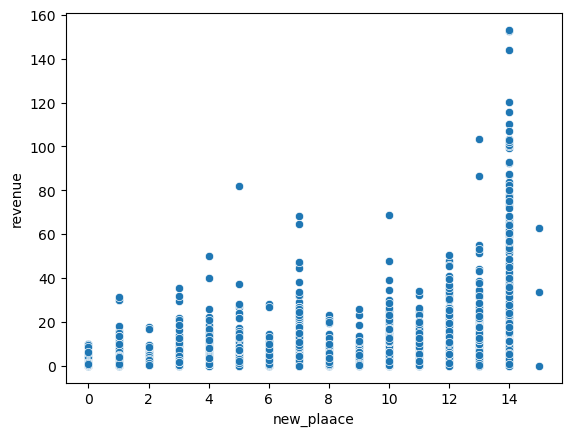

In [683]:
import seaborn as sns

sns.scatterplot(data=df, x='new_plaace', y="revenue")